# Ejercicios de NumPy

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


# Proyecto Euler

- [Problema 3: Largest prime factor](https://projecteuler.net/problem=3) 
    - Fecha límite de entrega: 22 de septiembre, 2020 23:59
- [Problema 10: Summation of primes](https://projecteuler.net/problem=10) 
    - Fecha límite de entrega: 29 de septiembre, 2020 23:59

# NumPy

<div class="alert alert-info">
**Instrucciones**
<ul>
<li> Crea un `notebook` llamado `NumPy_tarea` en tu carpeta.
<li> La primera celda debe de ser tipo `heading 1` y deberá de decir **Ejercicios de NumPy**. 
<li> La segunda celda debera incluir 
<pre>
%pylab inline
import numpy as np
</pre>
<li> Resuelve en ella los problemas de este archivo. Asegúrate de copiar el texto del problema en la celda de arriba de tu solución.
</div>

<div class="alert alert-danger">
Esta tarea se debe de entregar el viernes 25 de septiembre, 2020 antes de las 23:59 horas.
</div>

## Pregunta 1

Crea los siguientes arreglos con los tipos correctos. 

- Un arreglo de $5 \times 5$ cuya diagonal sean $[2.0, 3.0, 4.0, 5.0]$
- Un arreglo de $4 \times 4$ cuyo último renglón sea $[1,2,3,4]$ y el resto sean $0$.

In [55]:
arr_1=np.array([1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]).reshape(5,5)
arr_2=np.zeros((4,4))
arr_2[3:]=(1,2,3,4)

In [56]:
arr_1

array([[1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5]])

In [5]:
arr_2

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 2., 3., 4.]])

## Pregunta 2

En este ejercicio realizaremos una [**criba de Eratóstenes**](http://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

<div class="alert alert-warning">
**Nota**: Ejercicio basado en el presentado en `C4P`.
</div>

(a) Crea un arreglo de booleanos de **shape** `(100,)`, con todos sus elementos `True`.  El índice representa el número.

In [78]:
bool_arr = np.ones((100,), dtype=bool)

In [79]:
bool_arr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

(b) "Tacha" los elementos `0` y `1`.

In [80]:
bool_arr[0:2]=False

(c) Para cada entero subsiguiente, tacha sus múltiplos. Una manera de hacerlo es el código que se muestra. Explica que hace el código, sobretodo explica que hace el *slicing*.

In [81]:
N_max = int(np.sqrt(len(bool_arr)))
for j in range(2, N_max):
    bool_arr[2*j::j] = False
    
    
    #### EXPLICACIÓN: El codigo asigna a la variable N_max  la raíz cuadrada del número de elementos
    ####              que guarda el aggerglo de de booleanos 'bool_ar' pero transformada como un tipo de dato entero (integer).
    ####      
    ####              El loop va iterando por cada valor de la secuencia que va de 2 hasta el valor N_max-1 de tal forma que
    ####              cada iteración corresponde a que la asigna el valor de FALSE a partir del índice 2*j de 'bool_ar'
    ####              a todos los valores siguientes cada j saltos. y así por cada j en la secuencnia que va de 2 hasta N_max-1

In [82]:
bool_arr

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False])

(d) Mira la documentacion de `np.nonzero` para imprimir todos los números primos.

In [84]:
np.nonzero?

In [83]:
np.nonzero(bool_arr)

(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
        61, 67, 71, 73, 79, 83, 89, 97]),)

(e) Encapsula lo que acabamos de hacer en una función llamada `criba_eratostenes`, que reciba como argumento `maximo` el cual representa el tamaño del `array`. Muestra el resultado para `maximo = {10, 100, 200}`, usando un `for`.

In [155]:
def criba_eratostenes(maximo):
    arr = np.ones((maximo,), dtype=bool)
    arr[0:2]=False
    
    Nmax = int(np.sqrt(len(arr)))+1
    for j in range(2,Nmax):
        arr[2*j::j] = False
    return(np.nonzero(arr))

In [156]:
criba_eratostenes(10)

(array([2, 3, 5, 7]),)

In [157]:
maximo=[10,100,200]
for i in maximo:
    print(criba_eratostenes(i))

(array([2, 3, 5, 7]),)
(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97]),)
(array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199]),)


## Pregunta 3

Crea un [cubo rubik](http://en.wikipedia.org/wiki/Rubik%27s_Cube), partiendo de un arreglo de ceros y usando *slicing* dibuja cada una de las caras como si estuviera resuelto (cada color un entero a partir del $1$). Muestra con *indexing* que está resuelto (es decir, imprime las seis caras). ¿Cuántos elementos del arreglo quedaron en $0$?

In [178]:
cubo_rubik=np.zeros((6,3,3))

In [179]:
for i in range(0,6):
    cubo_rubik[i]+=i+1

In [180]:
cubo_rubik

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]],

       [[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]]])

In [181]:
for i in range(0,6):
    print(cubo_rubik[i])

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]
[[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]
[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]
[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]


## Pregunta 4

El **Sudoku** es un pasatiempo que consiste en un arreglo  $9 \times 9$ de celdas, con dígitos del 1 al 9, de tal manera que no se repiten valores en cada columna, cada renglón y en cada subarreglo de $3\times 3$.

(a) Crea una función llamada `correcto` que reciba un `array` $1d$ de tamaño 9 e indique si está completo o no (i.e. incluye los números del 1 al 9.

In [248]:
def correcto(array):
    if array.ndim==1 and len(array)==9 and 1 in array:
        if 2 in array:
            if 3 in array:
                if 4 in array:
                    if 5 in array:
                        if 6 in array:
                            if 7 in array:
                                if 8 in array:
                                    if 9 in array:
                                        print('completo')
    else:
        print('incompleto')

(b) Crea una función llamada `descomponer3x3` que reciba un `array` de enteros de $9\times 9$ y lo separe en sus 9 subarreglos $3\times3$.

In [264]:
def descomponer3x3(array):
    if array.ndim==2 and array.shape==(9, 9):
        array=array.reshape((9,3,3))
    return array

In [269]:
descomponer3x3(np.zeros((9,9)))[0].reshape(1,9)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

(c) Crea la función `esSolucion` que recibe un `array` de $9\times 9$ y devuelve si es o no solución del sudoku.

In [276]:
def esSolucion(array):
    if array.ndim==2 and array.shape==(9, 9):
        for i in range(0,9):
            if correcto(descomponer3x3(array)[i].reshape(1,9))=='completo' and correcto(array[:,:i+1])=='completo' and correcto(array[i:,:])=='completo':
                print('es soulción del sudoku')
    else:
        print('no es solución del sudoku')
            
            
            
            
    
    

## Pregunta 5

Utiliza el archivo `sunspots.txt` (localizado en la carpeta `data`), el cual contiene el número de manchas solares por cada mes desde enero de 1749. La primera columna es el mes, el segundo el número de manchas.

(a) Escribe el código que lea el archivo y haga una gráfica de las manchas en función del tiempo. Formatea el eje $x$ para que se muestren cada 25 años empezando en $1750$. 

<div class="alert alert-warning">
**NOTA:** La gráfica debe de estar en calidad de publicación.
</div>

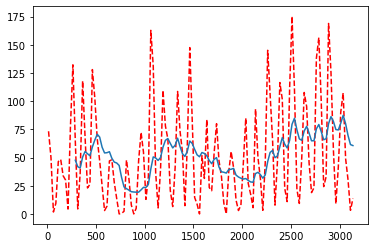

In [67]:
data=np.loadtxt('data/sunspots.txt')
x = data[12::25, 0]
y = data[12::25, 1]
plt.plot(x, y,'r--')
plt.plot(x[len(x)-len(movingaverage(y,12)):],movingaverage(y,12))
movingaverage(y,12)
plt.show()

(b) Calcula el [promedio móvil](http://en.wikipedia.org/wiki/Moving_average). Dibújalo sobre el dibujo original.

In [68]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

## Pregunta 6

Utiliza el archivo `starts.txt` (localizado en la carpeta `data`), el cual contiene la temperatura y magnitud de varias estrellas en la Vía Lactea.  Usa esta información para dibujar un **scatter plot** del logaritmo del brillo vs. la temperatura (en **K**). Este diagrama se conoce como diagrama de [Hertzsprung-Russell](http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram). 

(a) Lee el archivo y dibuja los datos tal como vienen en el archivo. Agrega etiquetas y formatea la gráfica de tal manera que tenga calidad de publicación.

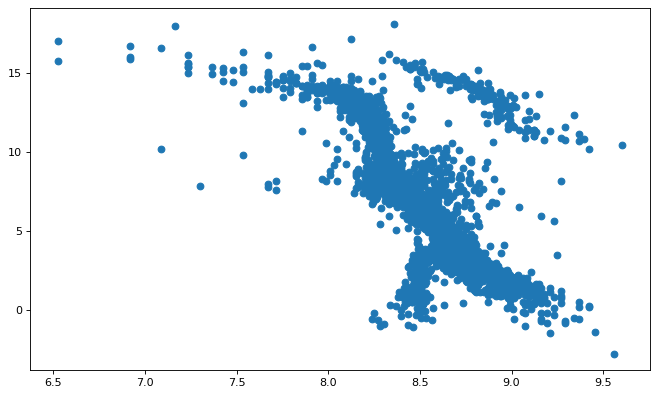

In [78]:
data=np.loadtxt('data/stars.txt')
x = log(data[:, 0])
y = data[:, 1]
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x, y)

(-5.0, 20.0)

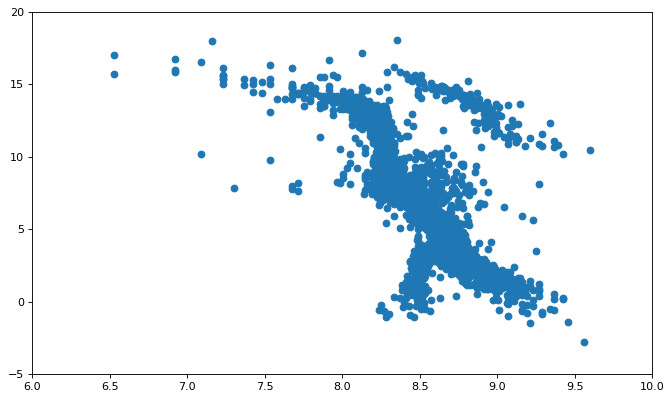

In [83]:
data=np.loadtxt('data/stars.txt')
x = log(data[:, 0])
y = data[:, 1]
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x, y)
plt.xlim(6,10)
plt.ylim(-5,20)

(b) Ahora usa el `xlim()` y  `ylim()` para que quede de manera correcta el diagrama. Hay regiones donde las estrellas parece que se aglomeran, ve el archivo de [wikipedia]( http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) y agrega anotaciones para explicarlas.
